
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [37]:
## library imports here
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, get_scorer_names, f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [7]:
X = ha[['age', 'chol']]
y = ha['cp']


k_pipeline = Pipeline([
    ("k_classifier", KNeighborsClassifier())
])

n_neighbors = {'k_classifier__n_neighbors': [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]}

gscv = GridSearchCV(k_pipeline, n_neighbors, cv = 5, scoring='accuracy')
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"n": [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80], "scores": gscv_fitted.cv_results_['mean_test_score']})

,n,scores
0,1,0.376835
1,5,0.391919
2,10,0.414007
3,15,0.436027
4,20,0.469158
5,25,0.454276
6,30,0.446936
7,40,0.479933
8,50,0.472458
9,60,0.457778


In [8]:
X = ha[['age', 'chol']]
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


k_pipeline = Pipeline([
    ("k_classifier", KNeighborsClassifier(n_neighbors=40))
])


k_fit = k_pipeline.fit(X_train, y_train)


k_pred = k_fit.predict(X_test)



In [9]:
lda = LinearDiscriminantAnalysis()

X = ha[['age', 'chol']]
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lda_fit = lda.fit(X_train,y_train)

lda_pred = lda_fit.predict(X_test)

In [13]:
X = ha[['age', 'chol']]
y = ha['cp']


tree_pipeline = Pipeline([
    ("tree_classifier", DecisionTreeClassifier())
])

min_samples_leaf = {'tree_classifier__min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]}

gscv = GridSearchCV(tree_pipeline, min_samples_leaf, cv = 5, scoring='accuracy')
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"n": [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80], "scores": gscv_fitted.cv_results_['mean_test_score']})

,n,scores
0,1,0.362155
1,5,0.362761
2,10,0.366195
3,15,0.432256
4,20,0.476296
5,25,0.465185
6,30,0.457778
7,40,0.450438
8,50,0.450438
9,60,0.457845


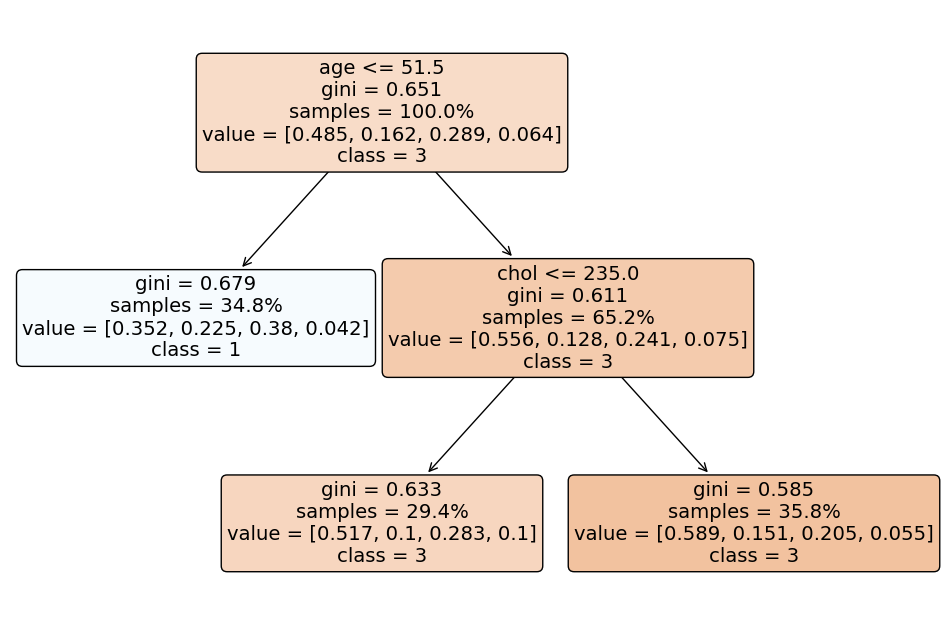

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


X = ha[['age', 'chol']]
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

tree_classifier = DecisionTreeClassifier(min_samples_leaf=60)
  
tree_fit = tree_classifier.fit(X_train, y_train)

tree_pred = tree_fit.predict(X_test)

class_names = list(map(str, y.unique()))

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_fit, feature_names=list(X.columns), class_names=class_names, filled=True, rounded=True, proportion=True)
plt.show()

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [24]:
ha['cp_is_3'] = np.where(ha['cp'] == 3, 1, 0)
ha['cp_is_2'] = np.where(ha['cp'] == 2, 1, 0)
ha['cp_is_1'] = np.where(ha['cp'] == 1, 1, 0)
ha['cp_is_0'] = np.where(ha['cp'] == 0, 1, 0)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1


In [58]:
X = ha[['age', 'chol', 'trtbps', 'restecg', 'thalach', 'sex']]
y = ha['cp_is_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

print("F1 Score:", f1_score(y_test, logr_pred, average='macro'))

F1 Score: 0.48120300751879697


C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [59]:
X = ha[['age', 'chol']]
y = ha['cp_is_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

print("F1 Score:", f1_score(y_test, logr_pred, average='macro'))

F1 Score: 0.4051724137931035


In [60]:
X = ha[['age', 'chol']]
y = ha['cp_is_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

print("F1 Score:", f1_score(y_test, logr_pred, average= 'macro'))

F1 Score: 0.45669291338582674


In [31]:
X = ha[['age', 'chol']]
y = ha['cp_is_0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

print("F1 Score:", f1_score(y_test, logr_pred))

F1 Score: 0.5172413793103449


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [35]:
ha_0_1 = ha[~((ha['cp'] == 2) | (ha['cp'] == 3))]
ha_0_2 = ha[~((ha['cp'] == 1) | (ha['cp'] == 3))]
ha_0_3 = ha[~((ha['cp'] == 1) | (ha['cp'] == 2))]

In [38]:
X = ha_0_1[['age', 'chol']]
y = ha_0_1['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

y_probs = logr_fit.predict_proba(X_test)[:, 1]
roc_auc_scores = roc_auc_score(y_test, y_probs)
print("auc Score:", roc_auc_scores)

auc Score: 0.7553763440860215


In [40]:
X = ha_0_2[['age', 'chol']]
y = ha_0_2['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

y_probs = logr_fit.predict_proba(X_test)[:, 1]
roc_auc_scores = roc_auc_score(y_test, y_probs)
print("auc Score:", roc_auc_scores)

auc Score: 0.6636904761904762


In [39]:
X = ha_0_3[['age', 'chol']]
y = ha_0_3['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

logr = LogisticRegression()

logr_fit = logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

y_probs = logr_fit.predict_proba(X_test)[:, 1]
roc_auc_scores = roc_auc_score(y_test, y_probs)
print("auc Score:", roc_auc_scores)

auc Score: 0.5687500000000001
